In [45]:
import pandas as pd
import numpy as np
import seaborn as sns

In [46]:

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [63]:
df = pd.read_csv('train.csv')


In [64]:
# shape and data types of the data
print("Data shape",df.shape)



Data shape (1460, 81)


In [65]:
print("Data variables types",df.dtypes)

Data variables types Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [66]:
# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['Id' 'MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold'
 'SalePrice']


In [67]:
# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' 'KitchenQual'
 'Functional' 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageQual'
 'GarageCond' 'PavedDrive' 'PoolQC' 'Fence' 'MiscFeature' 'SaleType'
 'SaleCondition']


- Checking for missing values

created missing indicator for: LotFrontage
created missing indicator for: Alley
created missing indicator for: MasVnrType
created missing indicator for: MasVnrArea
created missing indicator for: BsmtQual
created missing indicator for: BsmtCond
created missing indicator for: BsmtExposure
created missing indicator for: BsmtFinType1
created missing indicator for: BsmtFinType2
created missing indicator for: Electrical
created missing indicator for: FireplaceQu
created missing indicator for: GarageType
created missing indicator for: GarageYrBlt
created missing indicator for: GarageFinish
created missing indicator for: GarageQual
created missing indicator for: GarageCond
created missing indicator for: PoolQC
created missing indicator for: Fence
created missing indicator for: MiscFeature


<AxesSubplot:xlabel='index'>

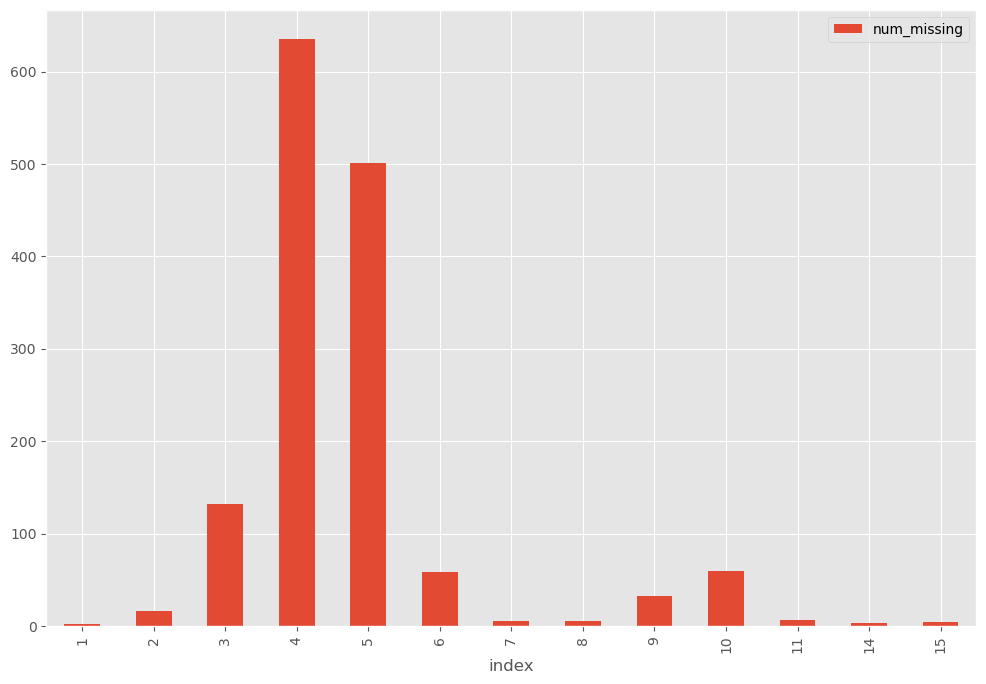

In [68]:
# creating a histogram to show missing values among all the dataset
 
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

- From the histogram above, it is shown that there is NO observations **without** missing values
- Also, most observations has around **4 missing values**

In [69]:
# a function that calculates the percentage of missing values in numeric varibales that has missing values

df_missing_numeric = df_numeric[['LotFrontage','GarageYrBlt','MasVnrArea']].copy()
for col in df_missing_numeric.columns:
    pct_missing = np.mean(df_missing_numeric[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

LotFrontage - 18%
GarageYrBlt - 6%
MasVnrArea - 1%


<AxesSubplot:>

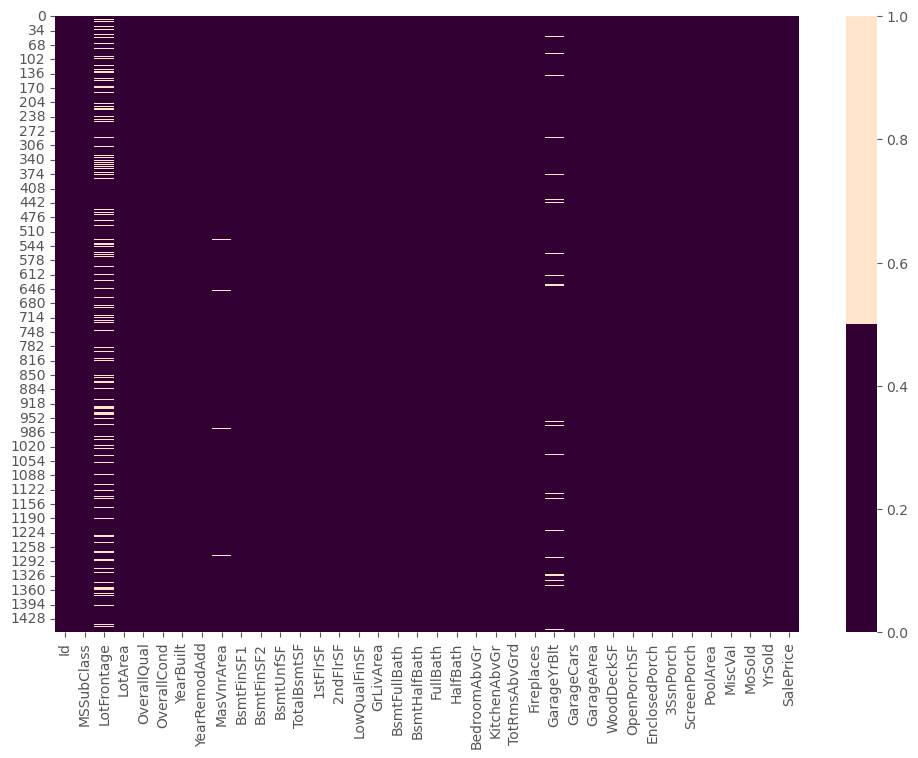

In [70]:
cols = df_numeric.columns[:39] # first 30 columns
colours = ['#330033', '#FFE5CC'] # specify the colours - beige is missing.  purple is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

From the heatmap of numerical columns, it is noticed that, variables:

 - **LotFrontage**:' Linear feet of street connected to property' | has **18%** of missing values

 - **GarageYrBlt**: 'Year garage was built' |  has **6%** of missing values

 - **MasVnrArea**: 'Masonry veneer area in square feet' | has **1%** of missing values, because of the low percentage we could consider to fill the missing values


<AxesSubplot:>

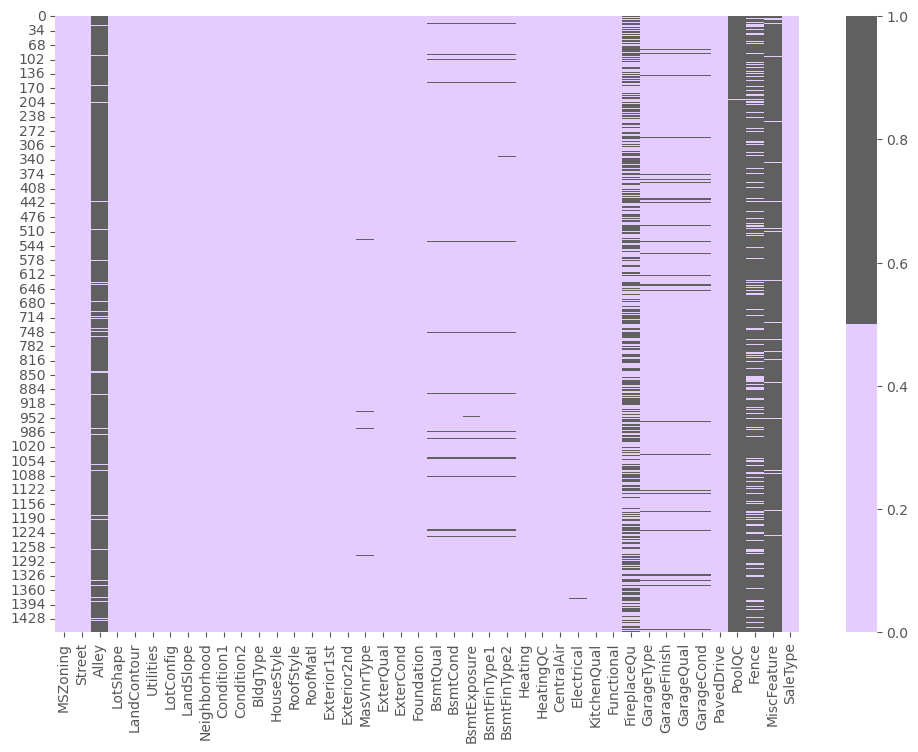

In [71]:
cols = df_non_numeric.columns[:42] # first 30 columns
colours = ['#E5CCFF', '#606060'] # specify the colours - grey is missing. purple is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

From the heatmap of non-numerical columns, it is noticed that, variables:
- **PoolQC**: 'Pool quality' !NA is no pool!!!
- **MiscFeature**: 'Miscellaneous feature not covered in other categories'
- **Fence**: 'Fence quality'
- **FireplaceQu**: 'Fireplace quality'
- **Alley**: 'Type of alley access to property'  

 has the most of missing values, while,
 
 - **GarageType**: 'Masonry veneer area in square feet' 
 - **GarageFinish**:'Interior finish of the garage'
 - **GarageQual**:'Garage quality'
 - **GarageCond**'Garage condition'
 
  of some properties share the same missing values
 and, 
 - **BsmtQual**:'Baement Quality'
 - **BsmtCond**: 'Basement condition'
 - **BsmtExposure**: ' Refers to walkout or garden level walls'
 - **BsmtFinType1**:'Rating of basement finished area'
 - **BsmtFinType2**:'Rating of basement finished area (if multiple types)' 

 of some properties share the same missing values
 and,
 
 - **MasVnrType**:'Masonry veneer type' 
 has few missing values that could be filled
 

In [72]:
# a function that calculates the percentage of missing values in non numeric varibales that has missing values as shown in the heat map

df_missing_non_numeric = df_non_numeric[['PoolQC','MiscFeature','Fence','FireplaceQu','Alley','GarageType','GarageFinish','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrType']].copy()
for col in df_missing_non_numeric.columns:
    pct_missing = np.mean(df_missing_non_numeric[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

PoolQC - 100%
MiscFeature - 96%
Fence - 81%
FireplaceQu - 47%
Alley - 94%
GarageType - 6%
GarageFinish - 6%
GarageQual - 6%
GarageCond - 6%
BsmtQual - 3%
BsmtCond - 3%
BsmtExposure - 3%
BsmtFinType1 - 3%
BsmtFinType2 - 3%
MasVnrType - 1%


- After inspection of PoolQC variable values, it was found that it gave 100% because in the dataset 'NA' which means null to python was used as indicator to 'No pool'

 for this situation, NA in PoolQC can be changed to another value, for example 'NP'

In [77]:
df_non_numeric['PoolQC'] = df_non_numeric['PoolQC'].fillna("NP")

In [78]:
df_missing_non_numeric = df_non_numeric[['PoolQC','MiscFeature','Fence','FireplaceQu','Alley','GarageType','GarageFinish','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrType']].copy()
for col in df_missing_non_numeric.columns:
    pct_missing = np.mean(df_missing_non_numeric[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

PoolQC - 0%
MiscFeature - 96%
Fence - 81%
FireplaceQu - 47%
Alley - 94%
GarageType - 6%
GarageFinish - 6%
GarageQual - 6%
GarageCond - 6%
BsmtQual - 3%
BsmtCond - 3%
BsmtExposure - 3%
BsmtFinType1 - 3%
BsmtFinType2 - 3%
MasVnrType - 1%
